## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

# Assignment 1, Task 2: Multilayer Perceptron (MLP)
You will get to know how to build basic fully connected neural network.

In [1]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import pickle

from utils.cifar_utils import load_data

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhij\Anaconda3\envs\envTF113\lib\site-packages\tensorf

## Load Data

In [2]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()

# Data organizations:
# Train data: 49000 samples from original train set: 1~49,000
# Validation data: 1000 samples from original train set: 49,000~50,000
# Test data: 10000 samples from original test set: 1~10,000
# Development data (for gradient check): 100 from the train set: 1~49,000
num_training = 49000
num_validation = 1000
num_dev = 100

X_val = X_train[-num_validation:, :]
y_val = y_train[-num_validation:]

mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

X_train = X_train[:num_training, :]
y_train = y_train[:num_training]

# Preprocessing: subtract the mean value across every dimension for training data
mean_image = np.mean(X_train, axis=0)

X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image
X_test = X_test.astype(np.float32) - mean_image
X_dev = X_dev.astype(np.float32) - mean_image

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('Development data shape:', X_dev.shape)
print('Development data shape', y_dev.shape)

(49000, 3072) (1000, 3072) (10000, 3072) (100, 3072)
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)
Development data shape: (100, 3072)
Development data shape (100,)


## Part 1: Basic layers

### Create basic layer functions

<span style="color:red"><strong>TODO</strong></span>: Complete functions **affine_forward**, **affine_backward** in **./utils/layer_funcs.py**. The correctnes of completed functions will be checked by the following Jupyter notebook cells.

In [3]:
from utils.layer_funcs import affine_forward
from utils.layer_funcs import affine_backward

# generate data for checking
x = X_dev
w = np.random.rand(x.shape[1],100)
b = np.random.rand(100)
dout = np.ones((x.shape[0],100))

## Affine function -- H = W*X + b
out = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, x, w, b)

################################################
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #
################################################
## check by tf.gradients()
tf.reset_default_graph()
x_tf = tf.Variable(x, name='x')
w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')
out_tf = tf.matmul(x_tf,w_tf) + b_tf
init = tf.global_variables_initializer()

dx_tf = tf.gradients(out_tf, x_tf)
dw_tf = tf.gradients(out_tf, w_tf)
db_tf = tf.gradients(out_tf, b_tf)
tf_output = (dx_tf[0], dw_tf[0], db_tf[0])
with tf.Session() as sess:
    sess.run(init)
    out_check = sess.run(out_tf)
    dx_check, dw_check, db_check = sess.run(tf_output)

## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))
print("Is dw correct? {}".format(np.allclose(dw, dw_check)))
print("Is db correct? {}".format(np.allclose(db, db_check)))

Instructions for updating:
Colocations handled automatically by placer.
Is out correct? True
Is dx correct? True
Is dw correct? True
Is db correct? True


<span style="color:red"><strong>TODO</strong></span>: Complete functions **relu_forward**, **relu_backward** in **./utils/layer_funcs.py**.  The correctnes of completed functions will be checked by the following Jupyter notebook cells.

In [4]:
from utils.layer_funcs import relu_forward
from utils.layer_funcs import relu_backward

## Activation layers -- Here we introduce ReLU activation function
## since it is the most commonly used in computer vision problems.
## You can also try to implement 
## other activation functions like sigmoid, tanh etc.
x = X_dev
dout = np.ones(x.shape)
## ReLU
out = relu_forward(x)
dx = relu_backward(dout, x)

################################################
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #
################################################
## check by tf.gradients()
tf.reset_default_graph()
x_tf = tf.Variable(x, name='x')
out_tf = tf.nn.relu(x_tf)
init = tf.global_variables_initializer()

dx_tf = tf.gradients(out_tf, x_tf)[0]
with tf.Session() as sess:
    sess.run(init)
    out_check = sess.run(out_tf)
    dx_check = sess.run(dx_tf)

## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))

Is out correct? True
Is dx correct? True


<span style="color:red"><strong>TODO</strong></span>: Complete functions **softmax_loss** in **./utils/layer_funcs.py**.  The correctnes of completed functions will be checked by the following Jupyter notebook cells.

In [5]:
from utils.layer_funcs import softmax_loss

## generate some random data for testing
x = np.random.rand(100,10)
y = np.argmax(x, axis=1)

loss, dx = softmax_loss(x, y)

################################################
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #
################################################
## check by tf.gradients()
tf.reset_default_graph()
x_tf = tf.Variable(x, name='x')
y_tf = tf.Variable(y, name='y')
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits= x_tf, labels=tf.one_hot(y_tf,10))
loss_tf = tf.reduce_mean(cross_entropy)
dx_tf = tf.gradients(loss, x)
init = tf.global_variables_initializer()

dx_tf = tf.gradients(loss_tf, x_tf)
with tf.Session() as sess:
    sess.run(init)
    loss_check = sess.run(loss_tf)
    dx_check = sess.run(dx_tf)
## Print validation result
print("Is loss correct? {}".format(np.allclose(loss, loss_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))

Is loss correct? True
Is dx correct? True


### Create a single layer

Now try to combine an affine function and a nonlinear activation function into a single fully-connected layer. Edit the code in ./utils/layer_utils.py

$$\mathbf{O} = activation(\mathbf{W} \times \mathbf{X} + \mathbf{b}).$$

For this assignment, you need to create two types of layers as below. You can get started with the skeleton code in ./utils/layer_utils.py. The basic class structure has been provided, and you need to fill in the "TODO" part(s). 

* DenseLayer -- Affine transform >> ReLU
```
Class DenseLayer:
    Variables: weights, bias 
    Functions: 
        __init__: given (input_dim, output_dim, weight_scale)
        feedforward: TODO
        backforward: TODO      
```    
* AffineLayer -- Affine transform and the class structure is similar to DenseLayer

<span style="color:red"><strong>TODO</strong></span>: Complete function **AffineLayer** in **./utils/layer_utils.py**. The correctnes of completed functions will be checked by the following Jupyter notebook cells.

In [6]:
from utils.layer_utils import AffineLayer

## Affine
test_affine = AffineLayer(input_dim=3072,output_dim=100)
w, b = test_affine.params

## Data for correctness check
x = X_dev
dout = np.ones((x.shape[0], 100))
out = test_affine.feedforward(x)
dx = test_affine.backward(dout)
dw, db = test_affine.gradients

################################################
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #
################################################
## Use tf.gradients() to check
tf.reset_default_graph()
x_tf = tf.Variable(x, name='x')
w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')

def affine_layer(x, w, b):
    return tf.matmul(x, w) + b

out_tf = affine_layer(x_tf, w_tf, b_tf)
init = tf.global_variables_initializer()
    
dx_tf = tf.gradients(out_tf, x_tf)
dw_tf = tf.gradients(out_tf, w_tf)
db_tf = tf.gradients(out_tf, b_tf)
tf_output = (dx_tf[0], dw_tf[0], db_tf[0])
with tf.Session() as sess:
    sess.run(init)
    out_check = sess.run(out_tf)
    dx_check, dw_check, db_check = sess.run(tf_output)
    
## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))
print("Is dw correct? {}".format(np.allclose(dw, dw_check)))
print("Is db correct? {}".format(np.allclose(db, db_check)))

Is out correct? True
Is dx correct? True
Is dw correct? True
Is db correct? True


<span style="color:red"><strong>TODO</strong></span>: Complete function **DenseLayer** in **./utils/layer_utils.py**. The correctnes of completed functions will be checked by the following Jupyter notebook cells.

In [7]:
## First, let's make a dense layer
from utils.layer_utils import DenseLayer

## Affine + ReLU
test_dense = DenseLayer(input_dim=3072,output_dim=100)
w, b = test_dense.params

## Data for correctness check
x = X_dev
dout = np.ones((x.shape[0], 100))
out = test_dense.feedforward(x)
dx = test_dense.backward(dout)
dw, db = test_dense.gradients

################################################
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #
################################################
## Use tf.gradients() to check
tf.reset_default_graph()
x_tf = tf.Variable(x, name='x')
w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')

def dense_layer(x, w, b):
    return tf.nn.relu(tf.matmul(x, w) + b)

out_tf = dense_layer(x_tf, w_tf, b_tf)
init = tf.global_variables_initializer()

dx_tf = tf.gradients(out_tf, x_tf)
dw_tf = tf.gradients(out_tf, w_tf)
db_tf = tf.gradients(out_tf, b_tf)
tf_output = (dx_tf[0], dw_tf[0], db_tf[0])
with tf.Session() as sess:
    sess.run(init)
    out_check = sess.run(out_tf)
    dx_check, dw_check, db_check = sess.run(tf_output)

## Print validation result
print("Is out correct? {}".format(np.allclose(out, out_check)))
print("Is dx correct? {}".format(np.allclose(dx, dx_check)))
print("Is dw correct? {}".format(np.allclose(dw, dw_check)))
print("Is db correct? {}".format(np.allclose(db, db_check)))

Is out correct? True
Is dx correct? True
Is dw correct? True
Is db correct? True


## Part 2: More Backpropogation

Complete the class **TwoLayerNet** in **./utils/classifiers/twolayernet.py**. Through this experiment, you will create a two-layer neural network and learn about the backpropagation mechanism. The network structure is like **input >> DenseLayer >> AffineLayer >> softmax loss >> output**. Complete "TODO" part(s).
```
Class TwoLayerNet:   
    Functions: 
        __init__: GIVEN
        loss: TODO - calculate cross entropy loss and gradients wst all weights and bias.
        step: TODO - a single update all weights and bias by SGD.
        predict: TODO - output result(classification accuracy) based on input data
    
    Variables:
        layers
```

<span style="color:red"><strong>TODO</strong></span>: Complete class **TwoLayerNet** in **./utils/classifiers/twolayernet.py**. The correctnes of of the solution will be checked by the following Jupyter notebook cells.

In [8]:
from utils.classifiers.twolayernet import TwoLayerNet

## Define a model
model = TwoLayerNet(input_dim=3072, hidden_dim=100, num_classes=10, reg=1e-4)
W1, b1 = model.layer1.params
W2, b2 = model.layer2.params
## Backprogation -- Finish loss function and gradients calculation in TwoLayerNet
loss = model.loss(X_dev, y_dev)

################################################
# THE FOLLOWING CODE IS JUST FOR CHECKING.     #
# NO NEED TO CHANGE IT.                        #
################################################
## Check loss by tensorflow
x_tf = tf.placeholder(tf.float32, shape=(None, 3072))
y_tf = tf.placeholder(tf.uint8, shape=(None,))

W1_tf = tf.Variable(W1.astype('float32'))
b1_tf = tf.Variable(b1.astype('float32'))
W2_tf = tf.Variable(W2.astype('float32'))
b2_tf = tf.Variable(b2.astype('float32'))
h1_tf = tf.nn.relu(tf.matmul(x_tf, W1_tf) + b1_tf)
h2_tf = tf.matmul(h1_tf, W2_tf) + b2_tf
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits= h2_tf, labels=tf.one_hot(y_tf,10))
L2_loss = tf.nn.l2_loss(W1_tf) + tf.nn.l2_loss(W2_tf)
loss_tf = tf.reduce_mean(cross_entropy) + 1e-4 * L2_loss 
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    loss_check = sess.run(loss_tf, feed_dict={x_tf: X_dev, y_tf: y_dev})
    
## Print validation result
print("Is loss correct? {}".format(np.allclose(loss, loss_check)))

Is loss correct? True


### Train a two-layer network

#### Import functions for training and testing

In [9]:
from utils.train_funcs import train, test

#### Start training
We have provide you the **train( )** function in **./utils/train_func.py**

In [10]:
from utils.classifiers.twolayernet import TwoLayerNet

## TODO: Use previous layers to create a two layer neural network
## input->(affine->activation)->(affine->softmax)->output
## The recommended activation function is ReLU. And you can 
## also make a comparison with other activation function to see
## any difference.
model = TwoLayerNet(input_dim=3072, hidden_dim=100, num_classes=10, reg=1e-4, weight_scale=1e-3)

num_epoch = 10
batch_size = 500
lr = 5e-4
verbose = True
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 98
5000/49000 loss: 4.719690703051007
10000/49000 loss: 2.280982832476496
15000/49000 loss: 2.2304492960910425
20000/49000 loss: 2.193095671664914
25000/49000 loss: 2.1312855352535607
30000/49000 loss: 2.0974157376750937
35000/49000 loss: 2.0245396362160424
40000/49000 loss: 1.9832546289043649
45000/49000 loss: 1.9377025630358535
epoch 1: valid acc = 0.277, new learning rate = 0.000475
5000/49000 loss: 1.9409664760666174
10000/49000 loss: 1.8816681361803484
15000/49000 loss: 1.8392422544722336
20000/49000 loss: 1.8691627362853636
25000/49000 loss: 1.8470996268741111
30000/49000 loss: 1.810008184512555
35000/49000 loss: 1.8145927915831717
40000/49000 loss: 1.8157504358379175
45000/49000 loss: 1.7752888315095636
epoch 2: valid acc = 0.366, new learning rate = 0.00045125
5000/49000 loss: 1.7058587731921946
10000/49000 loss: 1.7589834950678913
15000/49000 loss: 1.6878198900350088
20000/49000 loss: 1.7104372036500515
25000/49000 loss: 1.7446975673058693
30000

0.4911

<span style="color:red"><strong>TODO</strong></span>: Plot training and validation accuracy history of each epoch

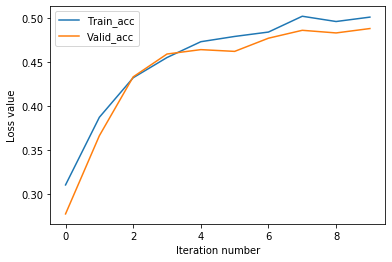

In [11]:
## TODO: plot the accuracy history
plt.plot(train_acc_hist, label='Train_acc')
plt.plot(val_acc_hist, label='Valid_acc')
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.legend()
plt.show()

#### Visulize the weight variable in the first layer.

Visualization of the intermediate weights can help you get an intuitive understanding of how the network works, especially in  Convolutional Neural Networks (CNNs).

In [12]:
from utils.display_funcs import visualize_pics

num of feature vectors: 100


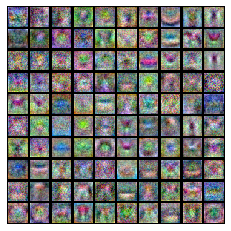

In [13]:
weights = model.layer1.params[0]
pics = weights.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
## visualization
visualize_pics(pics)

### Get test accuracy greater than 50%

For this part, you need to train a better two-layer net. The requirement is to get test accuracy better than 50%. If your accuracy is lower, for each 1% lower than 50%, you will lose 5 points.

Here are some recommended methods for improving the performance. Feel free to try any other method as you see fit.

1. Hyperparameter tuning: reg, hidden_dim, lr, learning_decay, num_epoch, batch_size, weight_scale.
2. Adjust training strategy: Randomly select a batch of samples rather than selecting them orderly. 
3. Try new optimization methods: Now we are using SGD, you can try SGD with momentum, adam, etc.
4. Early-stopping.
5. Good (better) initial values for weights in the model.
6. Try use PCA or other preprocessing methods. (Try task3-dim_reduction.ipynb before finishing this task)

A comparison between SGD and SGD with momentum.

* Stochastic gradient descent - SGD
    ```
    w = w - learning_rate * gradient 
    ```
* SGD with momentum
    ```
    v = momentum*v + learning_rate * gradient
    w = w - v
    ```

<span style="color:red"><strong>TODO</strong></span>: See below

In [14]:
from utils.classifiers.twolayernet import TwoLayerNet
# TODO: Use previous layers to create a two layer neural network.
# Try several solutions and report the best performing one.
# input->(affine->activation)->(affine->softmax)->output
# The recommended activation function is ReLU. You can 
# make a comparison with other activation functions to see
# the differences.
#
# You will need to execute code similar to below, using your parameter specs:
#    model = TwoLayerNet(input_dim=TBD, hidden_dim=TBD, num_classes=TBD, reg=TBD, weight_scale=TBD)
#    num_epoch = TBD
#    batch_size = TBD
#    lr = TBD
#    verbose = TBD
#    train_acc_hist, val_acc_hist = train(TBD)
#    test(TBD, TBD, TBD)
model = TwoLayerNet(input_dim=3072, hidden_dim=600, num_classes=10, reg=1e-6, weight_scale=1e-3)
#num_epoch = 15
num_epoch = 10
batch_size = 250
lr = 8e-4
verbose = True
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 196


C:\DL - Deep learning\e4040-2019fall-assignment1-abhijeet1994\utils\layer_funcs.py:150: RuntimeWarning: divide by zero encountered in log
  loss = np.log(x_out)


2500/49000 loss: 6.57406757249765
5000/49000 loss: 2.8624827153165247
7500/49000 loss: 2.644661630599295
10000/49000 loss: 2.3014861131032998
12500/49000 loss: 2.352362310090513
15000/49000 loss: 2.583711939025512
17500/49000 loss: 2.3623616908688034
20000/49000 loss: 2.241556612553294
22500/49000 loss: 2.2948470457815335
25000/49000 loss: 2.18750774229747
27500/49000 loss: 2.24002665270657
30000/49000 loss: 2.1593278174392503
32500/49000 loss: 2.0301469205498215
35000/49000 loss: 2.0490796295654814
37500/49000 loss: 1.7718979889144788
40000/49000 loss: 1.7050257331901844
42500/49000 loss: 1.6924784231873646
45000/49000 loss: 1.8322872805024994
47500/49000 loss: 1.744578606954927
epoch 1: valid acc = 0.392, new learning rate = 0.00076
2500/49000 loss: 1.5798451621009628
5000/49000 loss: 1.7443673976847205
7500/49000 loss: 1.8643388064352513
10000/49000 loss: 1.6487563721537741
12500/49000 loss: 1.619005526560862
15000/49000 loss: 1.648561521902091
17500/49000 loss: 1.7365073301495897
2

0.5084

#### <span style="color:red"><strong>TODO</strong></span>: Show your best result, including accuracy and weights of the first layer

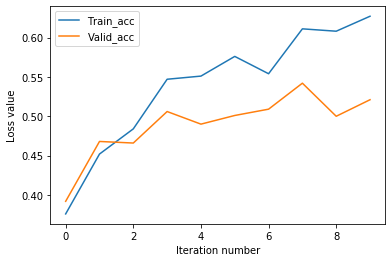

In [15]:
## TODO: plot training and validation accuracy
plt.plot(train_acc_hist, label='Train_acc')
plt.plot(val_acc_hist, label='Valid_acc')
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.legend()
plt.show()

num of feature vectors: 600


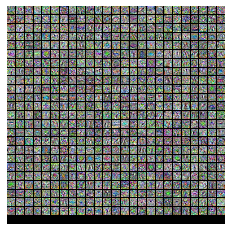

In [16]:
## TODO: Visualize weights
weights = model.layer1.params[0]
pics = weights.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
## visualization
visualize_pics(pics)

### Save your best model in a dictionary 

In [17]:
## Create "save_model" folder if it does not exist
save_dir = "./save_models/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

## Save your model
save_params = model.save_model()
with open("./save_models/best_model_5", "wb") as output_file:
    pickle.dump(save_params, output_file)

In [18]:
## A template of loading your model
#with open("./save_models/best_model.pkl", "rb") as input_file:
#    load_params = pickle.load(input_file)
#    
#model.update_model(load_params)

FileNotFoundError: [Errno 2] No such file or directory: './save_models/best_model.pkl'

## Part 3: Multilayer Net 

Complete the class **MLP** in **./utils/classifiers/mlp.py**. It should allow arbitrary settings for the number of hidden layers as well as the number of hidden neurons in each layer. **MLP** has a similar structure as a **TwoLayerNet** network.

```
class MLP:
    functions: __init__, loss, step, predict, check_accuracy
    variables: layers
```

<span style="color:red"><strong>TODO</strong></span>: Complete the class **MLP** in **./utils/classifiers/mlp.py**

In [19]:
from utils.classifiers.mlp import MLP

## TODO: Use a sequence of layers to create a multiple layer neural network
## input->(affine->activation)-> ... ->(affine->activation)->(affine->softmax)->output
model = MLP(input_dim=3072, hidden_dims=[500, 50], num_classes=10, reg=0.000001, weight_scale=1e-3)

num_epoch = 10
batch_size = 500
lr = 1e-3
verbose = False
train_acc_hist, val_acc_hist = train(model, X_train, y_train, X_val, y_val, 
                  num_epoch=num_epoch, batch_size=batch_size, learning_rate=lr, verbose=verbose)
test(model, X_test, y_test)

number of batches for training: 98
epoch 1: valid acc = 0.143, new learning rate = 0.00095
epoch 2: valid acc = 0.142, new learning rate = 0.0009025
epoch 3: valid acc = 0.142, new learning rate = 0.000857375
epoch 4: valid acc = 0.145, new learning rate = 0.0008145062499999999
epoch 5: valid acc = 0.143, new learning rate = 0.0007737809374999998
epoch 6: valid acc = 0.143, new learning rate = 0.0007350918906249997
epoch 7: valid acc = 0.144, new learning rate = 0.0006983372960937497
epoch 8: valid acc = 0.142, new learning rate = 0.0006634204312890621
epoch 9: valid acc = 0.145, new learning rate = 0.000630249409724609
epoch 10: valid acc = 0.146, new learning rate = 0.0005987369392383785
test acc: 0.1511


0.1511

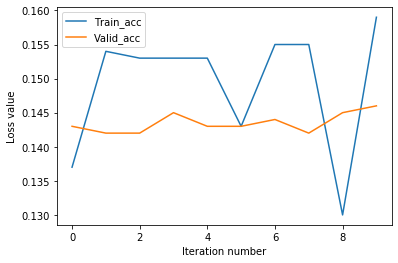

In [20]:
plt.plot(train_acc_hist, label='Train_acc')
plt.plot(val_acc_hist, label='Valid_acc')
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.legend()
plt.show()

## Part 4: Tensorflow MLP
In this part, you will use tensorflow modules to implement a MLP. We provide a demo of a two-layer net, of which style is referred to https://www.tensorflow.org/guide/keras, and https://www.tensorflow.org/guide/eager. 

You need to implement a multi-layer with 3 or 4 layers in a similar style.

### Demo: Two-layer MLP in Tensorflow

In [21]:
## Demo: Two-layer net in tensorflow.
hidden_dim = 100
reg_tf = tf.constant(0.01)

tf.reset_default_graph()
# define a tf.keras.Model class
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.W1 = tf.Variable(1e-2*np.random.rand(3072, hidden_dim).astype('float32'))
        self.b1 = tf.Variable(np.zeros((hidden_dim,)).astype('float32'))
        self.W2 = tf.Variable(1e-2*np.random.rand(hidden_dim, 10).astype('float32'))
        self.b2 = tf.Variable(np.zeros((10,)).astype('float32'))
    def call(self, inputs):
        """Run the model."""
        h1 = tf.nn.relu(tf.matmul(inputs, self.W1) + self.b1)
        out = tf.matmul(h1, self.W2) + self.b2
        return out

# Define and calculate loss function
def loss(model, inputs, targets, reg = tf.constant(0.01)):
    out = model(inputs)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits= out, labels=tf.one_hot(targets,10))
    L2_loss = tf.nn.l2_loss(model.W1) + tf.nn.l2_loss(model.W2)
    return tf.reduce_mean(cross_entropy) + reg * L2_loss 

# calculate gradients and do optimization
def step(model, inputs, targets, reg = tf.constant(0.01)):
    loss_value = loss(model, inputs, targets, reg=reg)
    return tf.train.GradientDescentOptimizer(1e-3).minimize(loss_value)

# calculate classification accuracy
def eval_acc(model, inputs, targets):
    correct_prediction = tf.equal(targets, tf.argmax(model(inputs),1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

num_train = 49000
batch_size = 500
num_batch = num_train//batch_size
num_epochs = 10
with tf.Session() as sess:
    model = Model()
    x_tf = tf.placeholder(tf.float32, shape=(None, 3072))
    y_tf = tf.placeholder(tf.int64, shape=(None,))
    train_step = step(model, x_tf, y_tf)
    accuracy = eval_acc(model, x_tf, y_tf)
    init = tf.global_variables_initializer()
    sess.run(init)
    for e in range(num_epochs):
        for i in range(num_batch):
            batch_xs, batch_ys = X_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            sess.run(train_step, feed_dict={x_tf: batch_xs, y_tf: batch_ys})
        val_acc = sess.run(accuracy, feed_dict={x_tf: X_val, y_tf: y_val})
        print('epoch {}: valid acc = {}'.format(e+1, val_acc))
    
    test_acc = sess.run(accuracy, feed_dict={x_tf: X_test, y_tf: y_test})
    print('test acc = {}'.format(test_acc))

epoch 1: valid acc = 0.23399999737739563
epoch 2: valid acc = 0.28299999237060547
epoch 3: valid acc = 0.3330000042915344
epoch 4: valid acc = 0.3370000123977661
epoch 5: valid acc = 0.3540000021457672
epoch 6: valid acc = 0.38499999046325684
epoch 7: valid acc = 0.40400001406669617
epoch 8: valid acc = 0.4189999997615814
epoch 9: valid acc = 0.4410000145435333
epoch 10: valid acc = 0.43799999356269836
test acc = 0.4129999876022339


### More layers

<span style="color:red"><strong>TODO</strong></span>: Create your MLP in tensorflow. Since you are going to create a deeper neural network, it is recommended to use "list" or "dictionary" to store your network parameters, ie., self.W and self.b. Besides, consider to use a loop to create your MLP network.

In [22]:
## For example
#self.W = {
#    'w1': tf.Variable(),
#    'w2': tf.Variable()),
#    'w3': tf.Variable()),
#    'w4': tf.Variable()),
#    ...
#}

   


hidden_dim = [3072,100,25,10]
reg_tf = tf.constant(0.01)

tf.reset_default_graph()
# define a tf.keras.Model class
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        keys1 = [str('w'+str(i)) for i in range(1, len(hidden_dim))]
        keys2 = [str('b'+str(i)) for i in range(1, len(hidden_dim))]
        weights = [tf.Variable(1e-2*np.random.rand(hidden_dim[i], hidden_dim[i+1]).astype('float32')) for i in range(len(hidden_dim)-1)]
        bias = [tf.Variable(np.zeros((hidden_dim[i],)).astype('float32')) for i in range(1, len(hidden_dim))]
        self.W =dict(zip(keys1, weights))
        self.b = dict(zip(keys2, bias))
    def call(self, inputs):
        out = inputs
        for i in range(1,len(self.W)):
            out = tf.nn.relu(tf.matmul(out, self.W[str('w'+str(i))]) + self.b[str('b'+str(i))])
        out = (tf.matmul(out, self.W[str('w'+str(len(self.W)))]) + self.b[str('b'+str(len(self.W)))])
        return out

# Define and calculate loss function
def loss(model, inputs, targets, reg = tf.constant(0.01)):
    out = model(inputs)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits= out, labels=tf.one_hot(targets,10))
    L2_loss = 0
    for i in range(len(model.W)): 
        L2_loss = L2_loss + tf.nn.l2_loss(model.W[str('w'+str(i+1))])
    return tf.reduce_mean(cross_entropy) + reg * L2_loss 

# calculate gradients and do optimization
def step(model, inputs, targets, reg = tf.constant(0.01)):
    loss_value = loss(model, inputs, targets, reg=reg)
    return tf.train.AdamOptimizer(1e-3).minimize(loss_value)

# calculate classification accuracy
def eval_acc(model, inputs, targets):
    correct_prediction = tf.equal(targets, tf.argmax(model(inputs),1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

num_train = 49000
batch_size = 500
num_batch = num_train//batch_size
num_epochs = 10
with tf.Session() as sess:
    
    model = Model()
    x_tf = tf.placeholder(tf.float32, shape=(None, 3072))
    y_tf = tf.placeholder(tf.int64, shape=(None,))
    train_step = step(model, x_tf, y_tf)
    accuracy = eval_acc(model, x_tf, y_tf)
    init = tf.global_variables_initializer()
    
    sess.run(init)
    for e in range(num_epochs):
        for i in range(num_batch):
            batch_xs, batch_ys = X_train[i*batch_size:(i+1)*batch_size], y_train[i*batch_size:(i+1)*batch_size]
            sess.run(train_step, feed_dict={x_tf: batch_xs, y_tf: batch_ys})
        val_acc = sess.run(accuracy, feed_dict={x_tf: X_val, y_tf: y_val})
        print('epoch {}: valid acc = {}'.format(e+1, val_acc))
    
    test_acc = sess.run(accuracy, feed_dict={x_tf: X_test, y_tf: y_test})
    print('test acc = {}'.format(test_acc))

epoch 1: valid acc = 0.30300000309944153
epoch 2: valid acc = 0.41499999165534973
epoch 3: valid acc = 0.45100000500679016
epoch 4: valid acc = 0.47600001096725464
epoch 5: valid acc = 0.492000013589859
epoch 6: valid acc = 0.5
epoch 7: valid acc = 0.5009999871253967
epoch 8: valid acc = 0.4869999885559082
epoch 9: valid acc = 0.4970000088214874
epoch 10: valid acc = 0.4869999885559082
test acc = 0.4731000065803528
